In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv("stroke-data - stroke-data.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
# univariant analysis
# drop the id col bcz there is no need and linked to this data of  stroke
df.drop(columns=["id"])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [11]:
#gender is categorical data
#steps to draw for categorical data
# 1:unique
# 2:value_counts
# 3:percentage
# 4:plot


In [12]:
df["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

<Axes: xlabel='gender'>

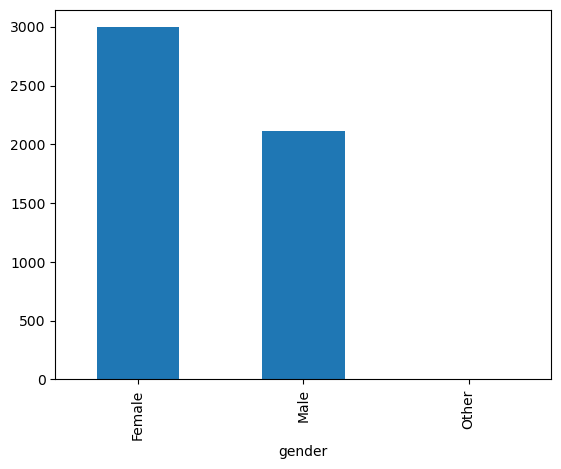

In [13]:
df["gender"].value_counts().plot(kind="bar")

In [14]:
df.shape[0]

5110

In [15]:
# percentage of female
female_percentage=(2115/5110)*100
female_percentage

41.3894324853229

In [16]:
# percentage of male
male_percentage=(2994/5110)*100
male_percentage

58.590998043052835

In [17]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [18]:
df["age"].unique()

array([6.70e+01, 6.10e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01,
       7.40e+01, 6.90e+01, 5.90e+01, 7.80e+01, 5.40e+01, 5.00e+01,
       6.40e+01, 7.50e+01, 6.00e+01, 5.70e+01, 7.10e+01, 5.20e+01,
       8.20e+01, 6.50e+01, 5.80e+01, 4.20e+01, 4.80e+01, 7.20e+01,
       6.30e+01, 7.60e+01, 3.90e+01, 7.70e+01, 7.30e+01, 5.60e+01,
       4.50e+01, 7.00e+01, 6.60e+01, 5.10e+01, 4.30e+01, 6.80e+01,
       4.70e+01, 5.30e+01, 3.80e+01, 5.50e+01, 1.32e+00, 4.60e+01,
       3.20e+01, 1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01,
       3.50e+01, 2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01,
       1.70e+01, 1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01,
       2.90e+01, 1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01,
       3.40e+01, 3.60e+01, 6.40e-01, 4.10e+01, 8.80e-01, 5.00e+00,
       2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00,
       9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01,
       1.08e+00, 1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e

In [19]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


C:\Users\pc\AppData\Local\Temp\ipykernel_19024\2322157967.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


<Axes: xlabel='age', ylabel='Density'>

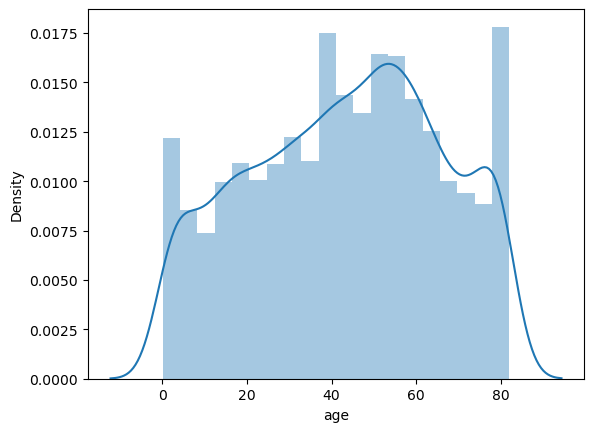

In [20]:
# age id numericl data- draw dist plot to visualize dist
sns.distplot(df["age"])

<Axes: ylabel='age'>

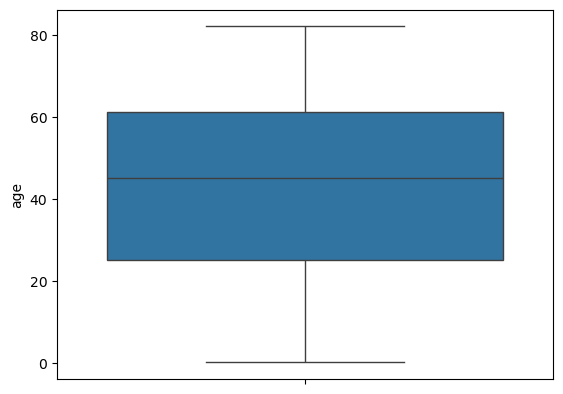

In [21]:
# box plot for outliers
sns.boxplot(df["age"])

In [22]:
# check data distribution shape
# peakedness or outliers in data
# helps you know if your data is balanced or biased to one side
#negative kurtosis indicates a flatter distribution
stats.kurtosis(df["age"])

np.float64(-0.9912147700517671)

In [23]:
#direction of data spread
#helps you detect heavy tais and extreme values
#this values is very close to 0
#meaning :slightly negative -->tiny left tail
#but practically almost symetric
# so your data is :Approximately normally distributed(almost symmetric)
# because skewness between -0.5 and +0.5 is considered near-normal
stats.skew(df["age"])

np.float64(-0.1370190866396024)

In [24]:
df["age"].skew()

np.float64(-0.1370593225984694)

In [25]:
df["age"].kurtosis()

np.float64(-0.9910102432016696)

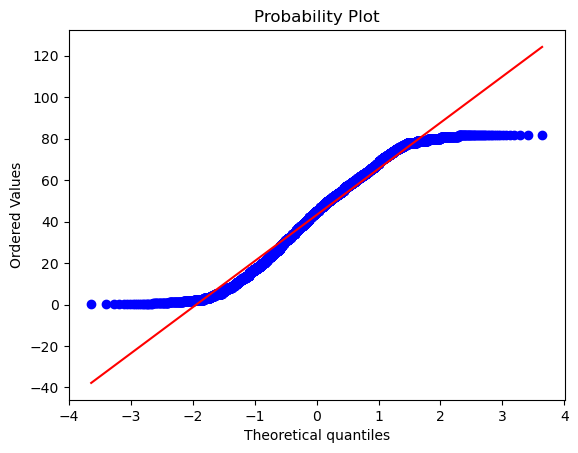

In [26]:
# Q-Q plot to check the distributions
stats.probplot(df["age"],dist="norm",plot=plt)
plt.show()

In [27]:
# hypertension is usually a categorical /binary columns (0=No ,1=Yes)
#Applying log to such data is statistically wrong
#Log transformations is only for continuous numerical data
#Examples:Age(age=60,70,77,7=88etc),income salary bolldpressure value,cholestol
#Not for:gender ,hypertension(0/1) diabetes(yes/no)
#these are categorical (binary) labesl even though look numeric
#So this column is:✅ Categorical,❌ NOT continuous


In [28]:
df["hypertension"].unique()

array([0, 1])

In [29]:
df["hypertension"].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

In [30]:
df["hypertension"].isnull().sum()

np.int64(0)

C:\Users\pc\AppData\Local\Temp\ipykernel_19024\360331775.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["hypertension"])


<Axes: xlabel='hypertension', ylabel='Density'>

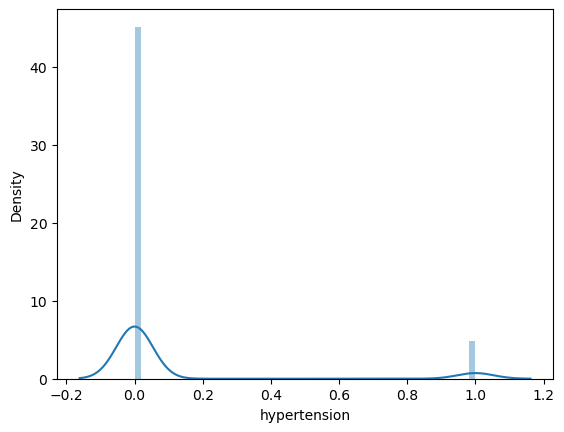

In [31]:
sns.distplot(df["hypertension"])

<Axes: ylabel='hypertension'>

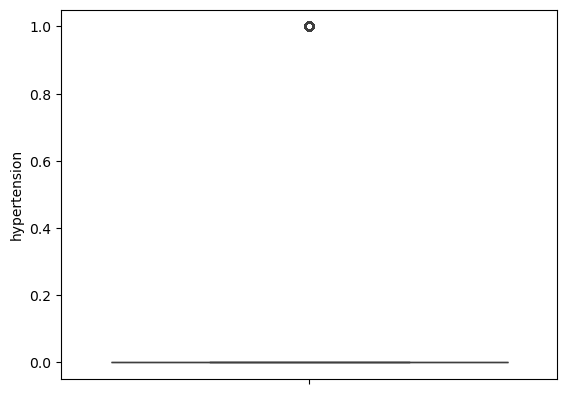

In [34]:
sns.boxplot(df["hypertension"])

In [35]:
stats.kurtosis(df["hypertension"])

np.float64(5.369023361442304)

In [36]:
stats.skew(df["hypertension"])

np.float64(2.714594511421973)

<Axes: xlabel='hypertension'>

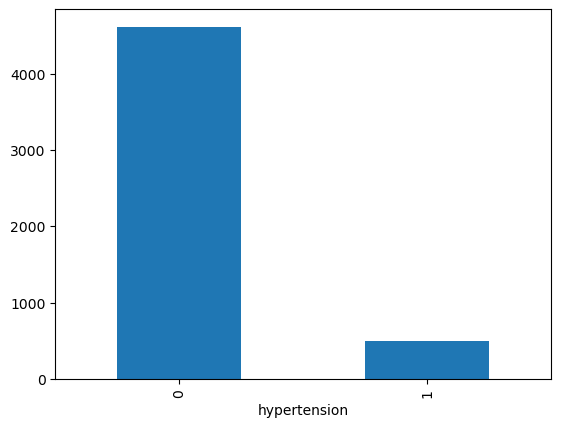

In [37]:
# If hypertension is categorical (0/1)
# bar plot is the correct visualization for categorical data
df["hypertension"].value_counts().plot(kind="bar")

In [39]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [40]:
df["heart_disease"].unique()

array([1, 0])

In [41]:
df["heart_disease"].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

In [42]:
df.shape[0]

5110

In [44]:
no_heart_dis=(4834/5110)*100
no_heart_dis

94.59882583170256

In [45]:
heart_dis=(276/5110)*100
heart_dis

5.401174168297456

C:\Users\pc\AppData\Local\Temp\ipykernel_19024\3005551864.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["heart_disease"])


<Axes: xlabel='heart_disease', ylabel='Density'>

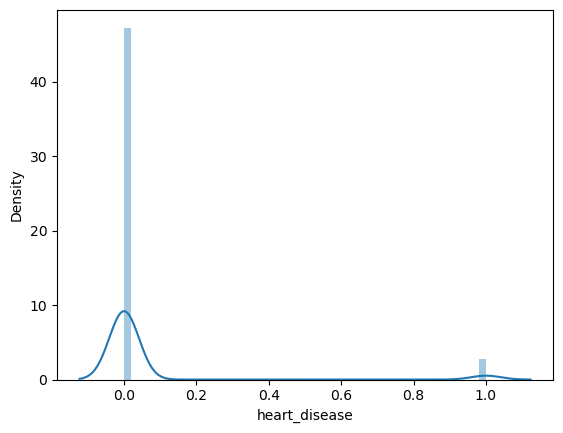

In [46]:
sns.distplot(df["heart_disease"])

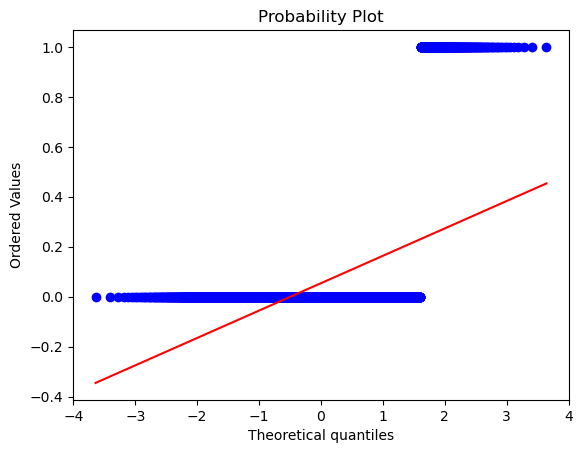

In [48]:
stats.probplot(df["heart_disease"],dist="norm",plot=plt)
plt.show()

In [49]:
stats.skew(df["heart_disease"])

np.float64(3.9460851899886302)

In [50]:
stats.kurtosis(df["heart_disease"])

np.float64(13.571588326647607)

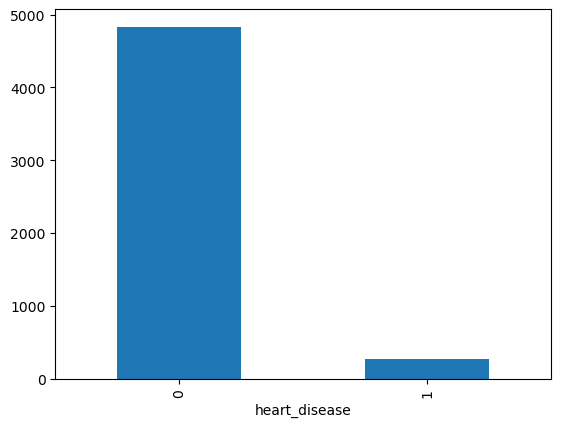

In [52]:
df["heart_disease"].value_counts().plot(kind="bar")
plt.show()

In [53]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [54]:
df["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [55]:
df["ever_married"].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

<Axes: xlabel='ever_married'>

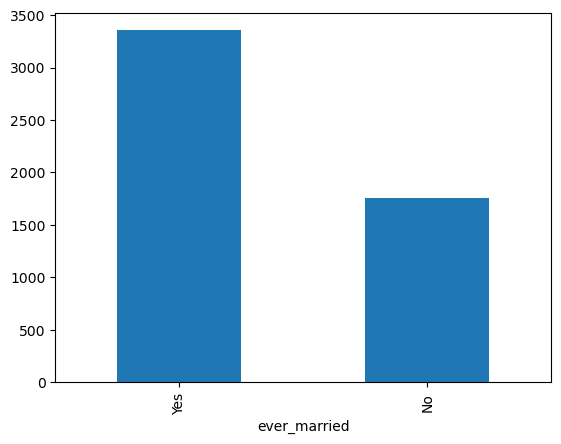

In [56]:
df["ever_married"].value_counts().plot(kind="bar")

In [57]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [58]:
df["work_type"].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [59]:
df["work_type"].isnull().sum()

np.int64(0)

<Axes: xlabel='work_type'>

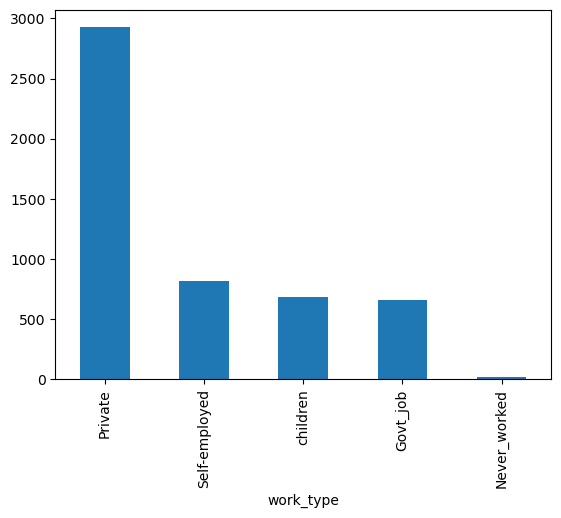

In [60]:
df["work_type"].value_counts().plot(kind="bar")

In [61]:
df["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [62]:
df["Residence_type"].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

<Axes: xlabel='Residence_type'>

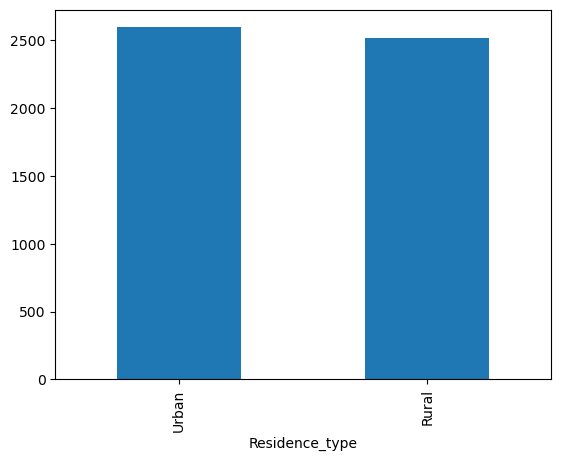

In [63]:
df["Residence_type"].value_counts().plot(kind="bar")

In [64]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [65]:
df["avg_glucose_level"].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

In [66]:
df["avg_glucose_level"].value_counts()

avg_glucose_level
93.88     6
73.00     5
72.49     5
91.85     5
91.68     5
         ..
61.98     1
91.01     1
120.03    1
138.51    1
118.41    1
Name: count, Length: 3979, dtype: int64

C:\Users\pc\AppData\Local\Temp\ipykernel_19024\2294464996.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["avg_glucose_level"])


<Axes: xlabel='avg_glucose_level', ylabel='Density'>

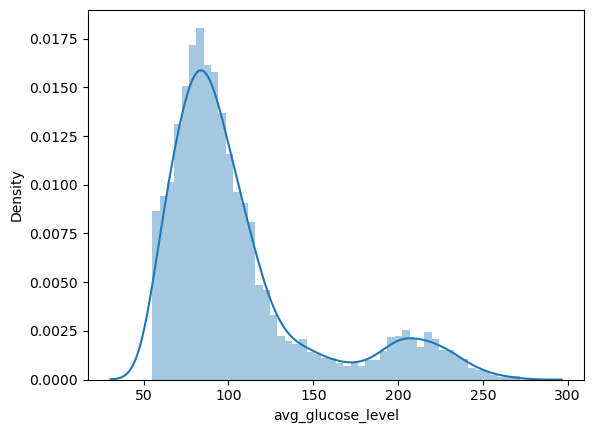

In [67]:
sns.distplot(df["avg_glucose_level"])

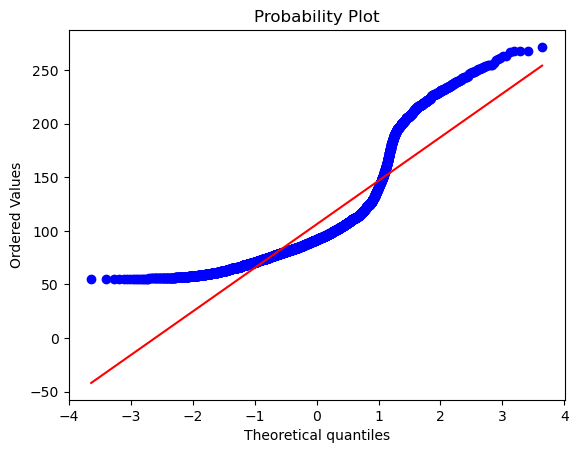

In [68]:
stats.probplot(df["avg_glucose_level"],dist="norm",plot=plt)
plt.show()

<Axes: ylabel='avg_glucose_level'>

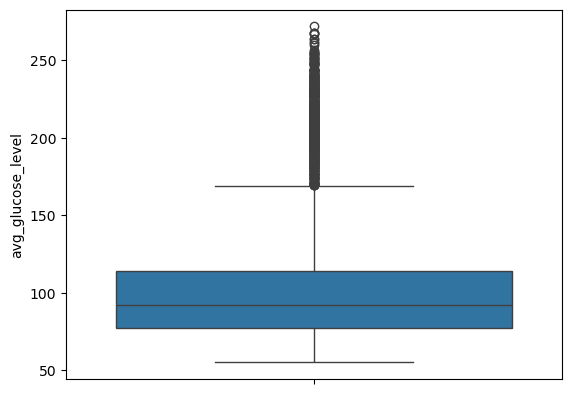

In [69]:
sns.boxplot(df["avg_glucose_level"])

In [71]:
df["avg_glucose_level"].mean()

np.float64(106.1476771037182)

In [73]:
df["avg_glucose_level"].std()

45.28356015058203

In [74]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [75]:
df["bmi"].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [76]:
df["bmi"].value_counts()

bmi
28.7    41
28.4    38
27.7    37
27.6    37
26.7    37
        ..
47.9     1
13.0     1
13.9     1
54.1     1
14.9     1
Name: count, Length: 418, dtype: int64

In [77]:
df["bmi"].isnull().sum()

np.int64(201)

In [78]:
df["bmi"]=df["bmi"].fillna(28.7)

In [79]:
df["bmi"].isnull().sum()

np.int64(0)

C:\Users\pc\AppData\Local\Temp\ipykernel_19024\38322286.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"])


<Axes: xlabel='bmi', ylabel='Density'>

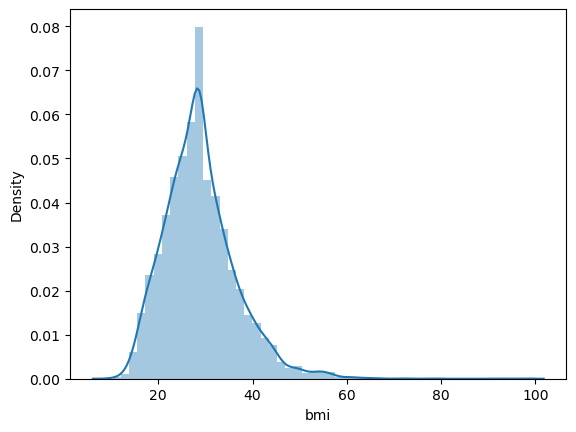

In [80]:
# concluusion -it looks like somwt gaussian so we fill the missing values with the mean
sns.distplot(df["bmi"])

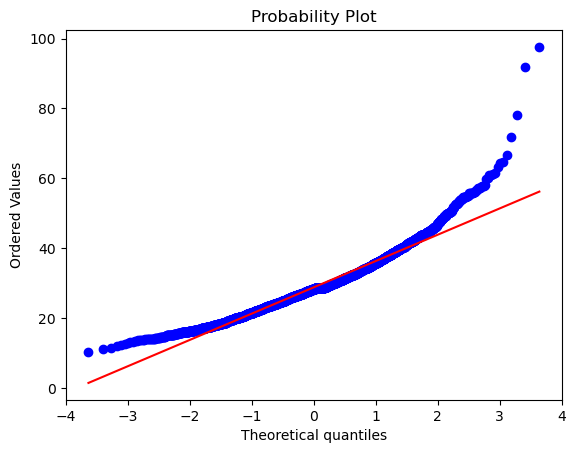

In [81]:
# to check weather the graph is gussain or not
stats.probplot(df["bmi"],dist="norm",plot=plt)
plt.show()

In [82]:
stats.kurtosis(df["bmi"])

np.float64(3.6222854263094906)

In [83]:
stats.skew(df["bmi"])

np.float64(1.0793233201555579)

In [84]:
# apply log transformations bcz the tail positively skewed and has large high end values
# and th skew and kurtosis values are slightly high need to do transformations bcz of graph is not a dist
# then re-check:
# QQ plot,skewness
# you should see:points closer to the straight line
#reduced skew(closer t 0)
log_values=np.log(df["bmi"])

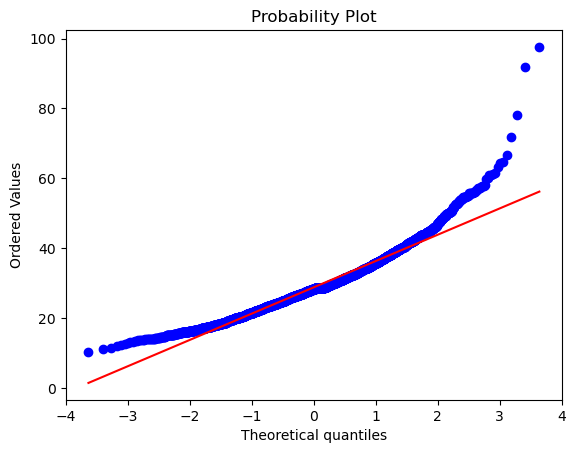

In [85]:
stats.probplot(df["bmi"],dist="norm",plot=plt)
plt.show()

In [86]:
stats.kurtosis(df["bmi"])

np.float64(3.6222854263094906)

In [87]:
stats.skew(df["bmi"])

np.float64(1.0793233201555579)

In [88]:
stats.boxcox(df["bmi"])

(array([3.68662797, 3.43209563, 3.56215706, ..., 3.49912001, 3.31272152,
        3.33690152]),
 np.float64(0.01315069966132489))

In [89]:
#Apply CDF (cumulative distribution function) when you need probabilities or percentiles not just the shape of data
# probability between two values
#percentiles/cutoffs
#p-values in hypothesis testing
#decision thresholds in ml or risk analysis
#do not use CDF when:
#checking normality--> use QQ plot
# cheking skewness--> use skew values
# visualization shape--> use hostrogram/distplot
#reducing skew->use transformation

In [90]:
data=df["bmi"]
sorted_data=np.sort(data)
cdf_values=np.arange(1,len(sorted_data)+1)/len(sorted_data)


In [91]:
cdf_values

array([1.95694716e-04, 3.91389432e-04, 5.87084149e-04, ...,
       9.99608611e-01, 9.99804305e-01, 1.00000000e+00])

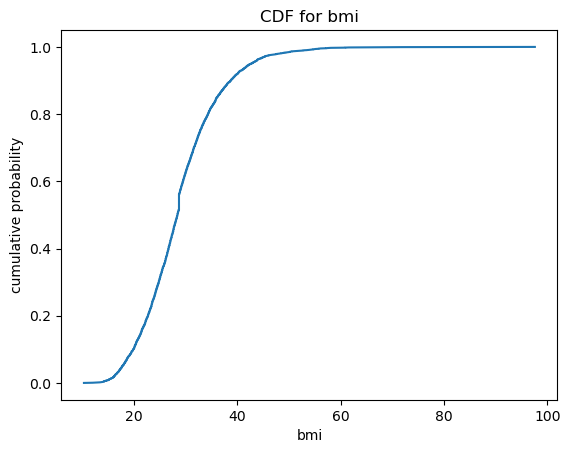

In [92]:
plt.title("CDF for bmi")
plt.xlabel("bmi")
plt.ylabel("cumulative probability")
plt.plot(sorted_data,cdf_values)
plt.show()

In [93]:
# Conclusion
# the cdf tells you what percentage pf people have BMI less than or equal to a given value
# most BMI values are concentrated between 3.0 and 3.7
# distribution is slightly right skewed(matches your skew=1.07)
#there are some high end outliers
#data is not perfectly normal
# cdf how to read graph
#left side (BMI 2,3-2.8) the curve is almost flat near 0-->very few people have BMI in this low range
#step middle sections (BMI 3.0-3.6)-most of your data lies here this is the main cluster of BMI vallues
#At BMI 3.4--> cdf 0.7 about 70% of people have BMI < 3.4
#right side(BMI>3.8)-very few people have very high BMI


<Axes: ylabel='bmi'>

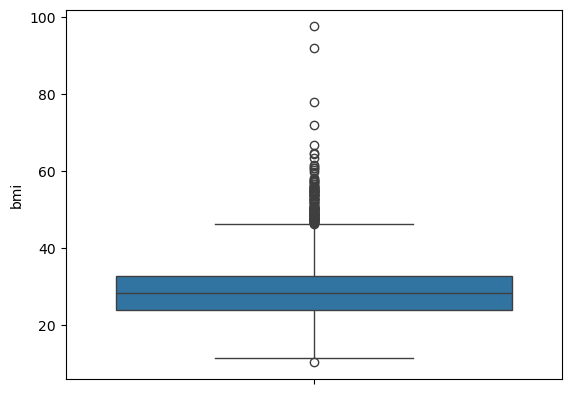

In [94]:
sns.boxplot(df["bmi"])

In [95]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [96]:
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [97]:
df["smoking_status"].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [98]:
df["smoking_status"].isnull().sum()

np.int64(0)

<Axes: xlabel='smoking_status'>

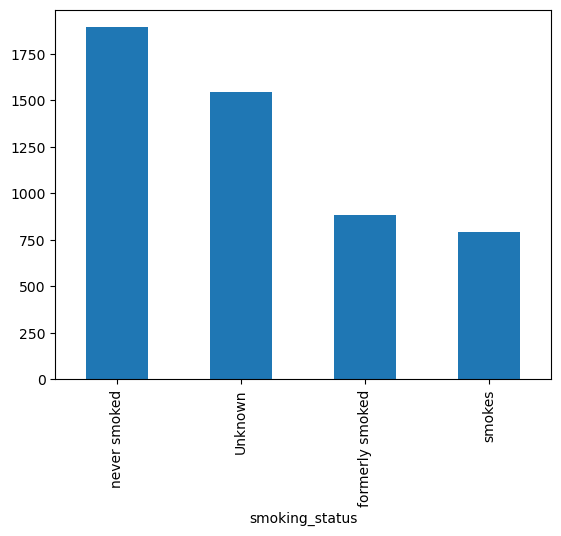

In [99]:
df["smoking_status"].value_counts().plot(kind="bar")

In [100]:
df["stroke"].unique()

array([1, 0])

In [101]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [102]:
df["stroke"].isnull().sum()

np.int64(0)

In [103]:
# total number of female who got the stroke
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [104]:
df[(df["gender"]=="Female")&(df["stroke"]==1)].shape[0]

141

In [106]:
# total number of male who got the stroke
df[(df["gender"]=="Male")&(df["stroke"]==1)].shape[0]

108

<Axes: xlabel='stroke'>

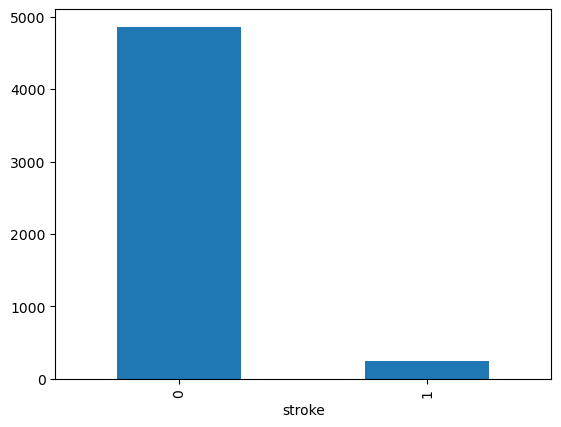

In [107]:
df["stroke"].value_counts().plot(kind="bar")

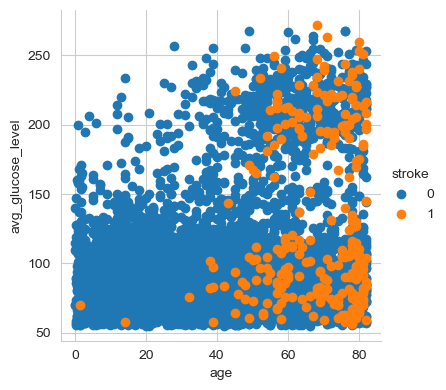

In [109]:
# Bivariant analysis---non--varinat relation
# conclusion are increases glucose level is increase
# the glucose level is getting increase  with age
# after 40 there are higher chaces of getting stroke
# the age less than 35 has the fewer chacnes of getting the stroke
# blue (0)=no stroke
# orange (1)=stroke
# stroke risk tends to increase with both age and higher average glucose levels
#stroke cases are concentrated at higher ages
#orange points appear much more frequantly after age 50-60 ,suggesting stroke risk increase with age
# higher glucose levels are linked with more strokes many stroke cases occur where glucose levels are above 150-180 indicating a possible association between high glucose and stroke
# younger people rerely show stroke cases-below age 40,most points are blue,meaning vary few strokes occur in  younger individuals
# No perfect eparation there is overlap: some peple with normal glucose still have stroke and some with high glucose do  not-so glucose alone is not only factor
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="stroke",height=4).map(plt.scatter,"age","avg_glucose_level").add_legend()
plt.show()



In [110]:
# the points are non linaer a we find the sperman
# positive corelation
# spearman is used to find the non linear and linear relationship---->the above  plot is non linear bcz pointsshow cloud-like dispersion and no straight -line trend
stats.spearmanr(df["age"],df["avg_glucose_level"])

SignificanceResult(statistic=np.float64(0.1451677092953779), pvalue=np.float64(1.8096446852948583e-25))

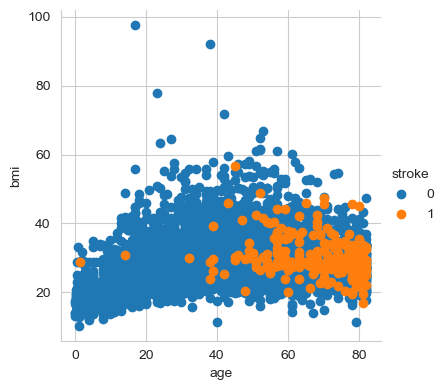

In [112]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="stroke",height=4).map(plt.scatter,"age","bmi").add_legend()
plt.show()

In [113]:
# the points are non linear so we find the spearmans
# positive correlation bcz the points are upwards
stats.spearmanr(df["age"],df["bmi"])

SignificanceResult(statistic=np.float64(0.36358841997024854), pvalue=np.float64(1.6399328880857554e-159))

In [114]:
# this is the sample size to find the CLT
# where CLT is n>30 apply CLT  if n<30 no need to apply
df.shape[0]

5110

In [115]:
# estimate avg for male and female apply CLT
female_data=df[df["gender"]=="Female"].shape[0]

In [116]:
female_data

2994

In [117]:
male_data=df[df["gender"]=="Male"].shape[0]
male_data

2115

In [120]:
#estimate avg for male and female-apply CLT
#female CLT
def apply_CLT_on_female(female_data, size_of_sample, no_of_samples):
    sample_means = []
    
    for i in range(no_of_samples):
        sample = np.random.choice(female_data, size=size_of_sample, replace=True)
        sample_means.append(np.mean(sample))
        
    return sample_means

In [121]:
size_of_sample=30
no_of_samples=1000
sample_means=apply_CLT_on_female(female_data,size_of_sample,no_of_samples)
print(np.mean(sample_means))

1489.5468666666668


In [124]:
# CLT on male
def apply_CLT_on_male(male_data,size_of_sample,no_of_sample):
    sample_means=[]
    for i in range(no_of_samples):
        sample=np.random.choice(male_data,size=size_of_sample,replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

In [125]:
size_of_sample=30
no_of_sample=1000
sample_means=apply_CLT_on_male(male_data,size_of_sample,no_of_sample)
print(np.mean(sample_means))

1060.5531666666666


In [127]:
def apply_CLT(data,size_of_sample,no_of_sample):
    sample_mean=[]
    for i in range(no_of_sample):
        sample=np.random.choice(data,size=size_of_sample,replace=True)
        sample_mean.append(np.mean(sample))
    return sample_mean
size_of_sample=30
no_of_sample=1000
sample_mean=apply_CLT(data,size_of_sample,no_of_sample)
sample_mean

[np.float64(31.269999999999992),
 np.float64(26.38333333333333),
 np.float64(28.173333333333336),
 np.float64(29.66),
 np.float64(30.05),
 np.float64(28.826666666666668),
 np.float64(28.126666666666672),
 np.float64(27.000000000000004),
 np.float64(29.71666666666666),
 np.float64(27.543333333333337),
 np.float64(27.526666666666674),
 np.float64(29.486666666666668),
 np.float64(28.093333333333337),
 np.float64(32.553333333333335),
 np.float64(29.156666666666673),
 np.float64(28.156666666666677),
 np.float64(30.59666666666666),
 np.float64(29.99),
 np.float64(28.500000000000004),
 np.float64(29.393333333333327),
 np.float64(27.220000000000002),
 np.float64(29.589999999999993),
 np.float64(29.830000000000005),
 np.float64(27.573333333333338),
 np.float64(27.98),
 np.float64(29.063333333333336),
 np.float64(28.59666666666666),
 np.float64(31.603333333333335),
 np.float64(29.943333333333335),
 np.float64(27.220000000000002),
 np.float64(30.230000000000004),
 np.float64(26.399999999999995),


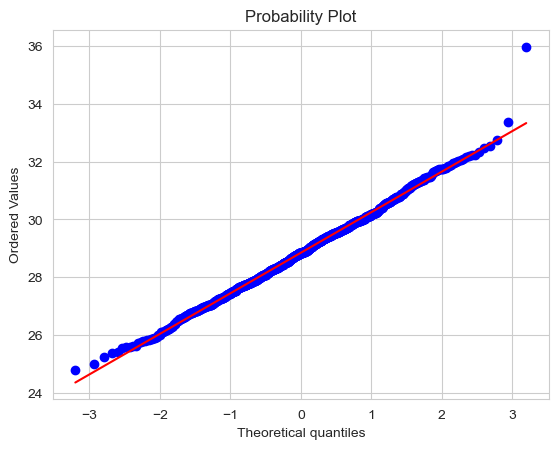

In [128]:
female_data=df[df["gender"]=="Female"]["bmi"]
sample_means=apply_CLT_on_female(data,30,1000)
stats.probplot(sample_means,dist="norm",plot=plt)
plt.show()

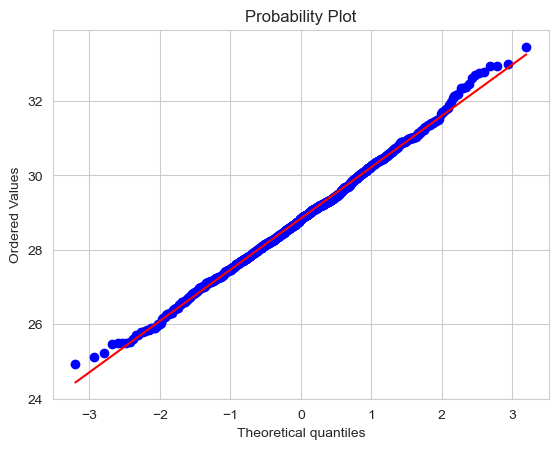

In [129]:
female_data=df[df["gender"]=="Male"]["bmi"]
sample_means=apply_CLT_on_female(data,30,1000)
stats.probplot(sample_means,dist="norm",plot=plt)
plt.show()

In [131]:
female_avg_bmi=df[df["gender"]=="Female"]["bmi"].mean()
female_avg_bmi

np.float64(29.05390781563126)

In [132]:
male_avg_bmi=df[df["gender"]=="Male"]["bmi"].mean()
male_avg_bmi

np.float64(28.650496453900708)

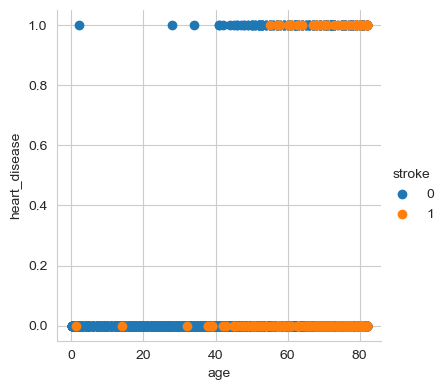

In [133]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="stroke",height=4).map(plt.scatter,"age","heart_disease").add_legend()
plt.show()

In [134]:
stats.spearmanr(df["age"],df["heart_disease"])

SignificanceResult(statistic=np.float64(0.26962727093389066), pvalue=np.float64(7.904110332957262e-86))

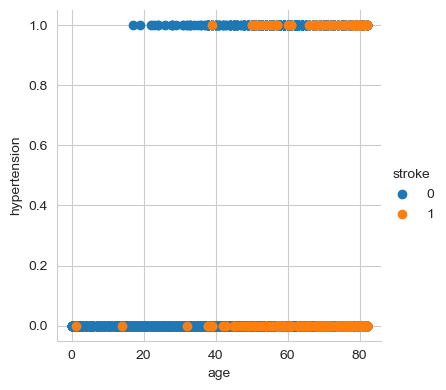

In [135]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="stroke",height=4).map(plt.scatter,"age","hypertension").add_legend()
plt.show()

In [136]:
stats.spearmanr(df["age"],df["hypertension"])

SignificanceResult(statistic=np.float64(0.28064743429853867), pvalue=np.float64(4.010053113295675e-93))

In [137]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.7,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [138]:
df.shape[0]

5110

In [139]:
df.shape[0]

5110

In [140]:
df[(df["gender"]=="Female") & (df["heart_disease"]==1)].shape[0]

113

In [141]:
female_percentage=(113/5110)*100
female_percentage

2.2113502935420746

In [142]:
df[(df["gender"]=="Male") & (df["heart_disease"]==1)].shape[0]

163

In [143]:
male_percentage=(163/5110)*100
male_percentage

3.189823874755381

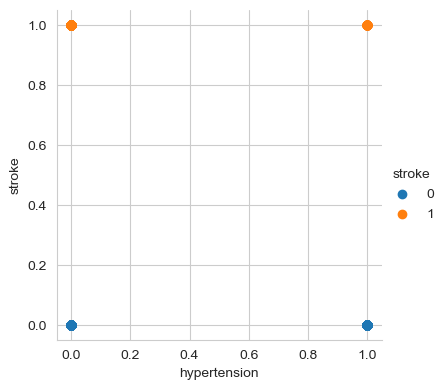

In [144]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="stroke",height=4).map(plt.scatter,"hypertension","stroke").add_legend()
plt.show()

In [145]:
stats.spearmanr(df["hypertension"],df["stroke"])

SignificanceResult(statistic=np.float64(0.1279038234664802), pvalue=np.float64(4.3675567699736756e-20))

In [147]:
# find the avg glucose level of the female
female_avg_bmi=df[df["gender"]=="Female"]["avg_glucose_level"].mean()
female_avg_bmi

np.float64(104.05780895123581)

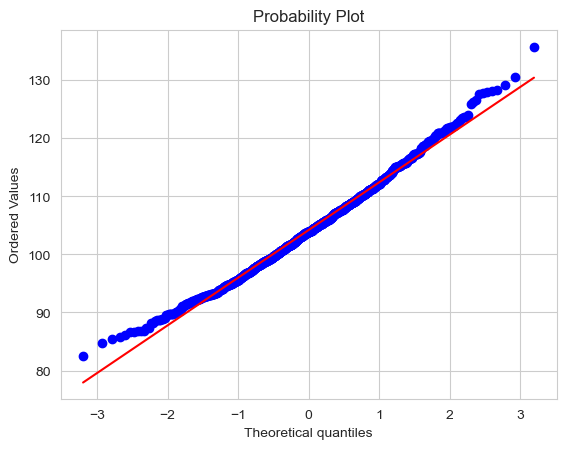

In [148]:
data=df[df['gender']=='Female']['avg_glucose_level']
sample_mean=apply_CLT(data,30,1000)
stats.probplot(sample_mean,dist="norm",plot=plt)
plt.show()

In [149]:
male_avg_bmi=df[df['gender']=='Male']['avg_glucose_level'].mean()
male_avg_bmi

np.float64(109.08852009456265)

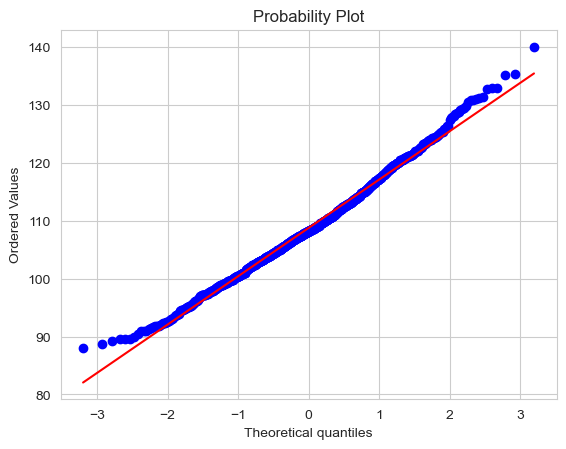

In [150]:
data=df[df['gender']=='Male']['avg_glucose_level']
sample_mean = apply_CLT(data, 30, 1000)
stats.probplot(sample_mean, dist='norm', plot=plt)
plt.show()

In [151]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.7,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [152]:
df[(df["Residence_type"]=="Urban") & (df["stroke"]==1)].shape[0]

135

In [153]:
per_urban=(135/5110)*100
per_urban

2.6418786692759295

In [154]:
df[(df["Residence_type"]=="Rural") & (df["stroke"]==1)].shape[0]

114

In [155]:
per_rur=(114/5110)*100
per_rur

2.2309197651663406

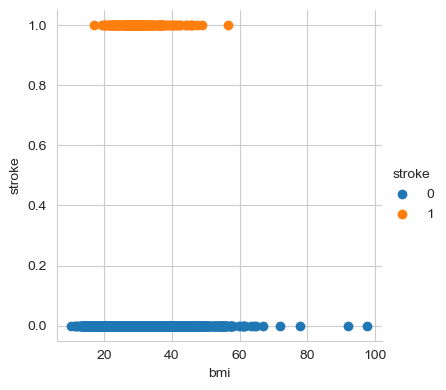

In [156]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="stroke",height=4).map(plt.scatter,"bmi","stroke").add_legend()
plt.show()

In [157]:
stats.spearmanr(df["bmi"],df["stroke"])

SignificanceResult(statistic=np.float64(0.053993613939444796), pvalue=np.float64(0.00011266240478290243))

In [158]:
# how many people are smokes who got a stroke
df[(df["smoking_status"]=="smokes")&(df["stroke"]==1)].shape[0]


42

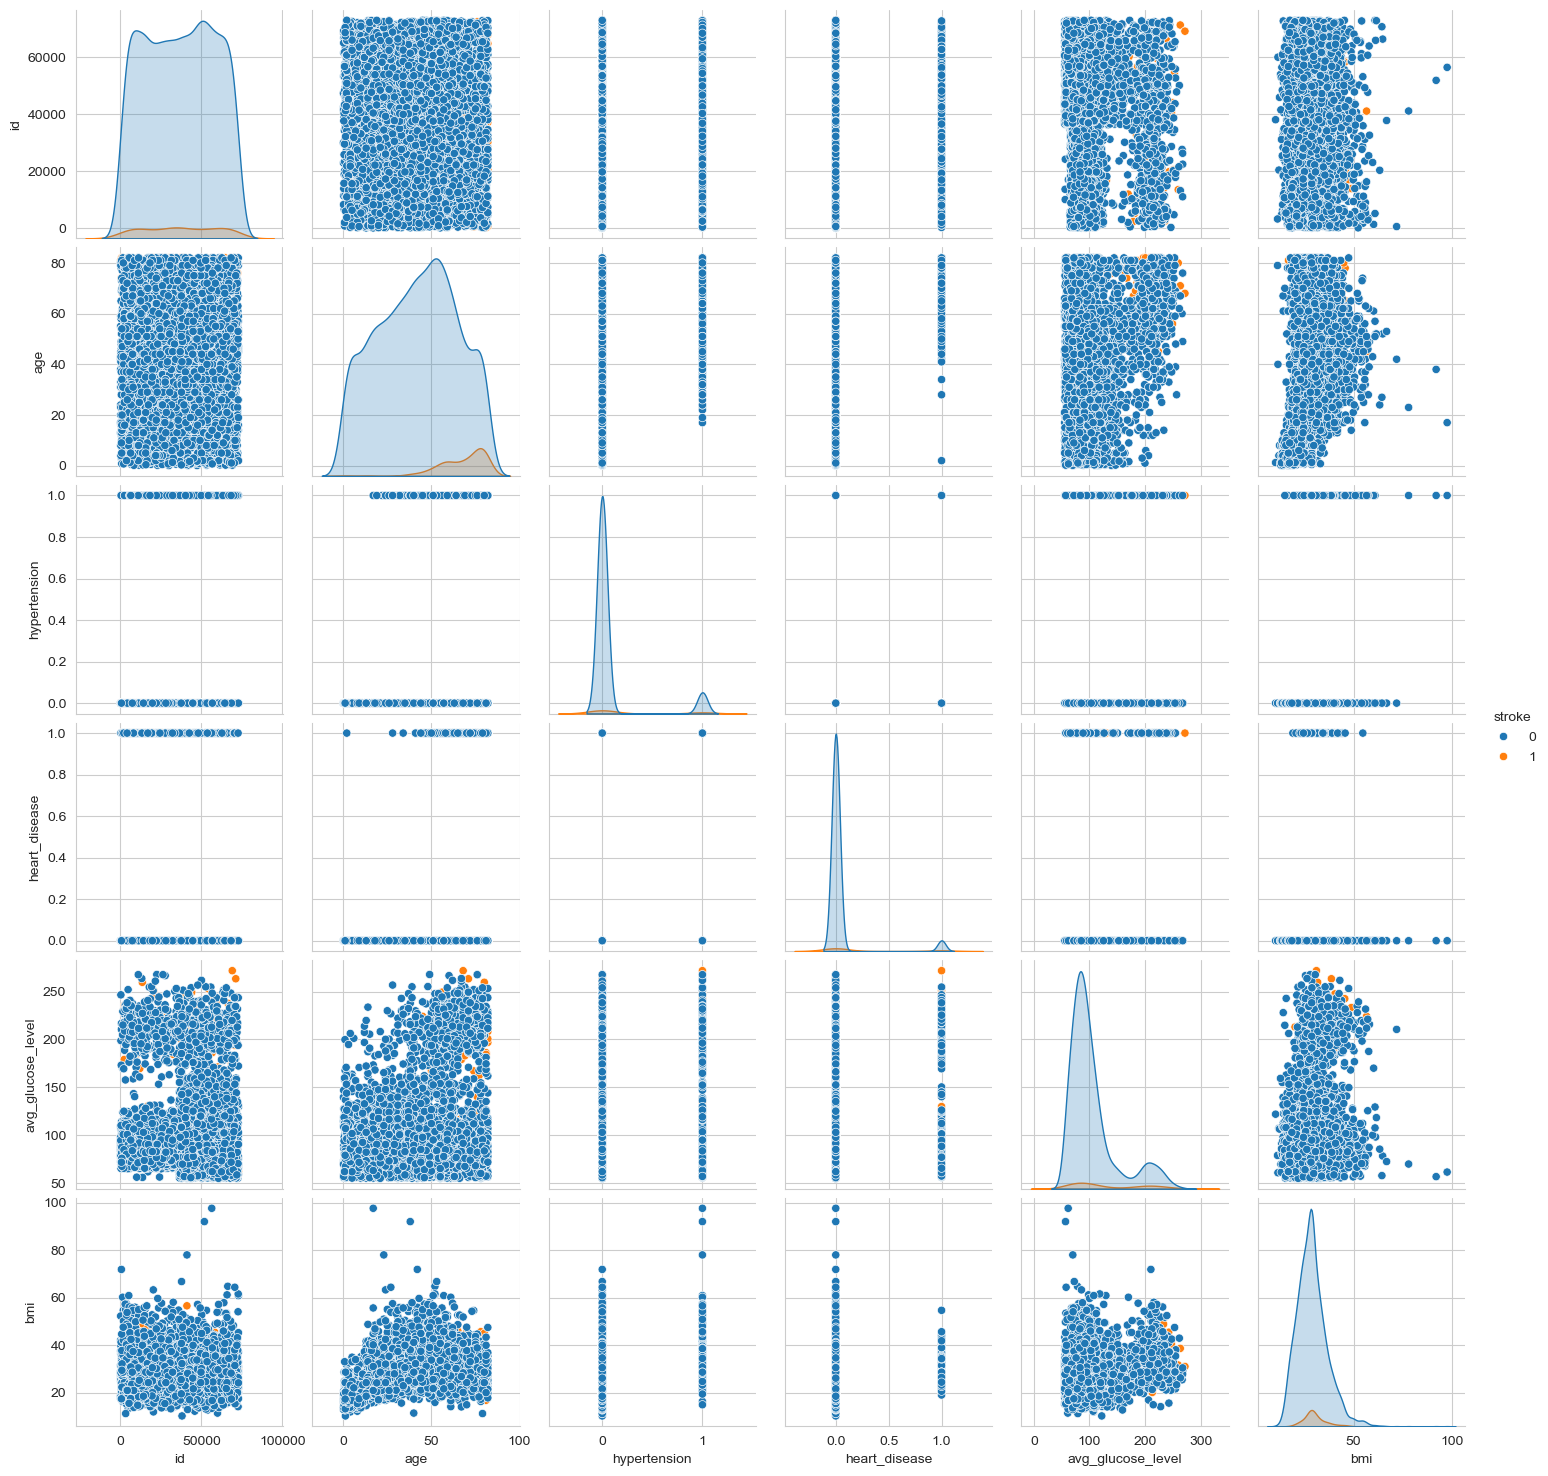

In [159]:
# Multivariant analysis
sns.pairplot(df,hue="stroke")
plt.show()

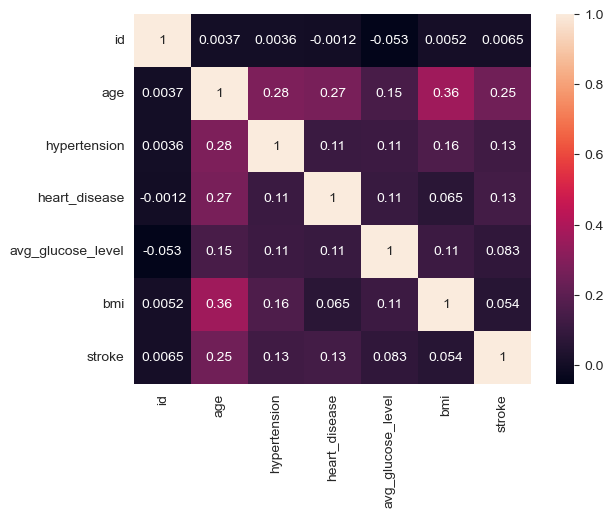

In [161]:
sns.heatmap(df.select_dtypes(include='number').corr(method='spearman'),annot=True)
plt.show()

In [162]:
df.columns.tolist()

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [163]:
continuous=[
    'age',
    'avg_glucose_level',
    'bmi'
]

In [164]:
df[continuous].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.885636
std,22.612647,45.283560,7.698109
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.400000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


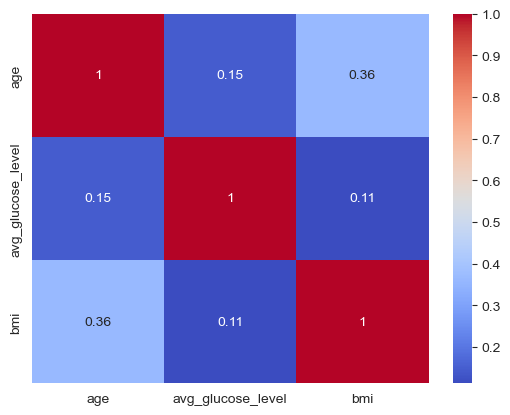

In [165]:
sns.heatmap(df[continuous].corr(method='spearman'),annot=True,cmap='coolwarm')
plt.show()

<Axes: >

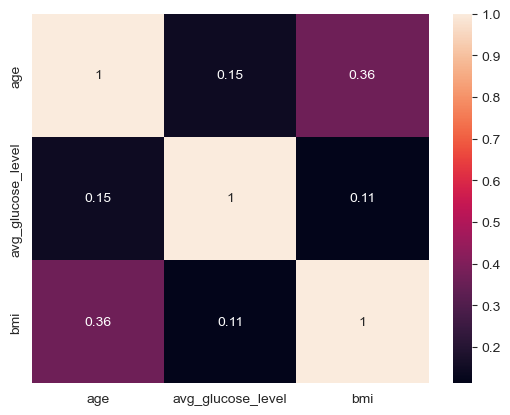

In [167]:
sns.heatmap(df[continuous].corr(method="spearman"),annot=True)
